In [2]:
!pip install qiskit

  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/fb/5a/f37b3c0e865f7c976cc5315d2de42f9fdf5ccb087e0ac95ae2e7741d3afd/qiskit-1.4.2-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for rustworkx>=0.15.0 from https://files.pythonhosted.org/packages/94/47/7e7c37fb73efcc87be6414b235534605c4008a4cdbd92a61db23b878eecd/rustworkx-0.16.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for stevedore>=3.0.0 from https://files.pythonhosted.org/packages/f7/45/8c4ebc0c460e6ec38e62ab245ad3c7fc10b210116cea7c16d61602aa9558/stevedore-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for symengine<0.14,>=0.11 from https://files.pythonhosted.org/packages/60/40/bb3faf5a3d4cc99cf5252cc3f4f5267568abd4aae6439374623841cc0025/symengine-0.13.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pbr>=2.0.0 from https://files.pythonhosted.org/packages/47/ac/684d71315abc7b121

In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

ModuleNotFoundError: No module named 'qiskit'

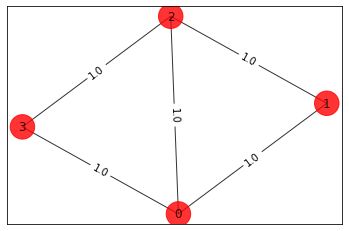

In [ ]:
# Generating a graph of 4 nodes

n=4 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[(0,1,1.0),(0,2,1.0),(0,3,1.0),(1,2,1.0),(2,3,1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

In [ ]:
# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)


[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [ ]:
qubitOp, offset = max_cut.get_operator(w)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())


Offset: -2.5
Ising Hamiltonian:
IIZZ	(0.5+0j)
IZIZ	(0.5+0j)
IZZI	(0.5+0j)
ZIIZ	(0.5+0j)
ZZII	(0.5+0j)



In [ ]:
aqua_globals.random_seed = 1953
backend = Aer.get_backend('statevector_simulator')
instance = QuantumInstance(backend=backend)

In [ ]:
from qore import Mine, ASP, QAOA, VQE
from qore.utils import measure_operator, get_bitstring_probabilities

In [ ]:
def analysis(circuit):
    x = get_bitstring_probabilities(circuit, instance, shots=1024)
    bitstr, prob = max(x.items(), key=lambda item: item[1])
    print(f"The most probable configuration and the corresponding probability: {bitstr, prob}")
    print("------------------------------------------------------------")

In [ ]:
evol_time = 40
nsteps = 200

circuit = ASP(qubitOp, 
    evol_time=evol_time, 
    nsteps=nsteps, 
    quantum_instance=instance).construct_circuit()

analysis(circuit)

The most probable configuration and the corresponding probability: ('0101', 0.5078125)
------------------------------------------------------------
